In [6]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import sys
path_file = ('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Plataforma\\')
sys.path.append(path_file)
from datamanager_updated import DataManager
# path_file = ('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Calibrator')
# sys.path.append(path_file)
from calibrator import Calibrator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [7]:
path_general = "D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Terraza_29\\Julio2022\\Datos\\Simple\\"

#Obtenemos una lista del nombre de los archivos dentro de la carpeta
list_name = os.listdir(path_general)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df

df_simple = []
for file in list_name:
    load_file = pd.read_csv(f'{path_general}{file}')
    df_simple.append(load_file)
df_simple = pd.concat(df_simple)

In [17]:
df_simple.head()

,latitude,longitude,altitude,lux,barometer_altitude,barometer_pressure,barometer_temperature,humidity,temperature,CO,NOx,NH3,NO2,O3,PM01,PM2_5,PM10
Date,,,,,,,,,,,,,,,,,
2022-07-11 03:30:39,0612.02N,07534.71W,1543.4,0,1476.92,84799.9,26.55,27.30,48.94,-1,0,285.11,60.42,132.97,6,10,14
2022-07-11 03:30:49,0612.02N,07534.71W,1543.4,0,1476.92,84801.9,26.56,27.80,48.55,-1,0,281.35,60.29,132.70,6,11,15
2022-07-11 03:30:59,0612.02N,07534.71W,1543.4,0,1476.92,84798.8,26.55,28.23,47.68,-1,0,285.11,60.24,132.41,6,11,14
2022-07-11 03:31:09,0612.02N,07534.71W,1543.4,0,1476.92,84801.4,26.55,28.56,46.99,-1,0,285.11,60.12,131.95,6,11,16
2022-07-11 03:31:19,0612.02N,07534.71W,1543.4,0,1476.92,84805.0,26.54,28.78,46.46,-1,0,285.11,60.14,131.98,6,11,16


In [10]:
df_simple.reset_index(drop=True, inplace=True)

In [11]:
df_simple["Date"] = df_simple["date"]+" "+df_simple["time"]

In [12]:
# Convert each element in the "Date" column to a datetime object with the specified format
df_simple["Date"] = df_simple["Date"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M:%S"))

# Format each datetime object into the desired format
df_simple["Date"] = df_simple["Date"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

In [13]:
df_simple["Date"] = pd.to_datetime(df_simple["Date"])

In [14]:
type(df_simple["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_simple.set_index("Date", drop=True, inplace=True)
df_simple.drop("time", axis=1, inplace=True)
df_simple.drop("date", axis=1, inplace=True)

In [18]:
Datamanager = DataManager(dataframe = df_simple)
df_simple29 = Datamanager.load_data()
Datamanager.show_period(df_simple29)

entre
La fecha inicial del conjunto de datos es 2022-07-11 03:30:39
La fecha final del conjunto de datos es 2022-07-19 18:51:20
No es clara la frecuencia. La frecuencia inicial es 0 minutos
El rango de datos es de: 8 days 15:20:41
El dataset tiene en total 4400 registros 
El dataset no tiene datos repetidos
Los datos están incompletos, hay que reindexar
Los datos faltantes son
2022-07-11 03:32:39
2022-07-11 03:33:39
2022-07-11 03:34:39
2022-07-11 03:35:39
2022-07-11 03:36:39
2022-07-11 03:37:39
2022-07-11 03:38:39
2022-07-11 03:39:39
2022-07-11 03:42:39
2022-07-11 03:43:39
2022-07-11 03:44:39
2022-07-11 03:45:39
2022-07-11 03:46:39
2022-07-11 03:47:39
2022-07-11 03:48:39
2022-07-11 03:49:39
2022-07-11 03:52:39
2022-07-11 03:53:39
2022-07-11 03:54:39
2022-07-11 03:55:39
2022-07-11 03:56:39
2022-07-11 03:57:39
2022-07-11 03:58:39
2022-07-11 03:59:39
2022-07-11 04:02:39
2022-07-11 04:03:39
2022-07-11 04:04:39
2022-07-11 04:05:39
2022-07-11 04:06:39
2022-07-11 04:07:39
2022-07-11 04:08:39


2022-07-12 04:42:39
2022-07-12 04:43:39
2022-07-12 04:44:39
2022-07-12 04:45:39
2022-07-12 04:46:39
2022-07-12 04:47:39
2022-07-12 04:48:39
2022-07-12 04:49:39
2022-07-12 04:50:39
2022-07-12 04:51:39
2022-07-12 04:52:39
2022-07-12 04:53:39
2022-07-12 04:54:39
2022-07-12 04:55:39
2022-07-12 04:56:39
2022-07-12 04:57:39
2022-07-12 04:58:39
2022-07-12 04:59:39
2022-07-12 05:00:39
2022-07-12 05:01:39
2022-07-12 05:02:39
2022-07-12 05:03:39
2022-07-12 05:04:39
2022-07-12 05:05:39
2022-07-12 05:06:39
2022-07-12 05:07:39
2022-07-12 05:08:39
2022-07-12 05:09:39
2022-07-12 05:10:39
2022-07-12 05:11:39
2022-07-12 05:12:39
2022-07-12 05:13:39
2022-07-12 05:14:39
2022-07-12 05:15:39
2022-07-12 05:16:39
2022-07-12 05:17:39
2022-07-12 05:18:39
2022-07-12 05:19:39
2022-07-12 05:20:39
2022-07-12 05:21:39
2022-07-12 05:22:39
2022-07-12 05:23:39
2022-07-12 05:24:39
2022-07-12 05:25:39
2022-07-12 05:26:39
2022-07-12 05:27:39
2022-07-12 05:28:39
2022-07-12 05:29:39
2022-07-12 05:30:39
2022-07-12 05:31:39


2022-07-12 21:21:39
2022-07-12 21:22:39
2022-07-12 21:23:39
2022-07-12 21:24:39
2022-07-12 21:25:39
2022-07-12 21:26:39
2022-07-12 21:27:39
2022-07-12 21:28:39
2022-07-12 21:29:39
2022-07-12 21:30:39
2022-07-12 21:31:39
2022-07-12 21:32:39
2022-07-12 21:33:39
2022-07-12 21:34:39
2022-07-12 21:35:39
2022-07-12 21:36:39
2022-07-12 21:37:39
2022-07-12 21:38:39
2022-07-12 21:39:39
2022-07-12 21:40:39
2022-07-12 21:41:39
2022-07-12 21:42:39
2022-07-12 21:43:39
2022-07-12 21:44:39
2022-07-12 21:45:39
2022-07-12 21:46:39
2022-07-12 21:47:39
2022-07-12 21:48:39
2022-07-12 21:49:39
2022-07-12 21:50:39
2022-07-12 21:51:39
2022-07-12 21:52:39
2022-07-12 21:53:39
2022-07-12 21:54:39
2022-07-12 21:55:39
2022-07-12 21:56:39
2022-07-12 21:57:39
2022-07-12 21:58:39
2022-07-12 21:59:39
2022-07-12 22:00:39
2022-07-12 22:01:39
2022-07-12 22:02:39
2022-07-12 22:03:39
2022-07-12 22:04:39
2022-07-12 22:05:39
2022-07-12 22:06:39
2022-07-12 22:07:39
2022-07-12 22:08:39
2022-07-12 22:09:39
2022-07-12 22:10:39


2022-07-13 22:21:39
2022-07-13 22:22:39
2022-07-13 22:23:39
2022-07-13 22:24:39
2022-07-13 22:25:39
2022-07-13 22:26:39
2022-07-13 22:27:39
2022-07-13 22:28:39
2022-07-13 22:29:39
2022-07-13 22:30:39
2022-07-13 22:31:39
2022-07-13 22:32:39
2022-07-13 22:33:39
2022-07-13 22:34:39
2022-07-13 22:35:39
2022-07-13 22:36:39
2022-07-13 22:37:39
2022-07-13 22:38:39
2022-07-13 22:39:39
2022-07-13 22:40:39
2022-07-13 22:41:39
2022-07-13 22:42:39
2022-07-13 22:43:39
2022-07-13 22:44:39
2022-07-13 22:45:39
2022-07-13 22:46:39
2022-07-13 22:47:39
2022-07-13 22:48:39
2022-07-13 22:49:39
2022-07-13 22:50:39
2022-07-13 22:51:39
2022-07-13 22:52:39
2022-07-13 22:53:39
2022-07-13 22:54:39
2022-07-13 22:55:39
2022-07-13 22:56:39
2022-07-13 22:57:39
2022-07-13 22:58:39
2022-07-13 22:59:39
2022-07-13 23:00:39
2022-07-13 23:01:39
2022-07-13 23:02:39
2022-07-13 23:03:39
2022-07-13 23:04:39
2022-07-13 23:05:39
2022-07-13 23:06:39
2022-07-13 23:07:39
2022-07-13 23:08:39
2022-07-13 23:09:39
2022-07-13 23:10:39


2022-07-14 15:00:39
2022-07-14 15:01:39
2022-07-14 15:02:39
2022-07-14 15:03:39
2022-07-14 15:04:39
2022-07-14 15:05:39
2022-07-14 15:06:39
2022-07-14 15:07:39
2022-07-14 15:08:39
2022-07-14 15:09:39
2022-07-14 15:10:39
2022-07-14 15:11:39
2022-07-14 15:12:39
2022-07-14 15:13:39
2022-07-14 15:14:39
2022-07-14 15:15:39
2022-07-14 15:16:39
2022-07-14 15:17:39
2022-07-14 15:18:39
2022-07-14 15:19:39
2022-07-14 15:20:39
2022-07-14 15:21:39
2022-07-14 15:22:39
2022-07-14 15:23:39
2022-07-14 15:24:39
2022-07-14 15:25:39
2022-07-14 15:26:39
2022-07-14 15:27:39
2022-07-14 15:28:39
2022-07-14 15:29:39
2022-07-14 15:30:39
2022-07-14 15:31:39
2022-07-14 15:32:39
2022-07-14 15:33:39
2022-07-14 15:34:39
2022-07-14 15:35:39
2022-07-14 15:36:39
2022-07-14 15:37:39
2022-07-14 15:38:39
2022-07-14 15:39:39
2022-07-14 15:40:39
2022-07-14 15:41:39
2022-07-14 15:42:39
2022-07-14 15:43:39
2022-07-14 15:44:39
2022-07-14 15:45:39
2022-07-14 15:46:39
2022-07-14 15:47:39
2022-07-14 15:48:39
2022-07-14 15:49:39


2022-07-15 07:40:39
2022-07-15 07:41:39
2022-07-15 07:42:39
2022-07-15 07:43:39
2022-07-15 07:44:39
2022-07-15 07:45:39
2022-07-15 07:46:39
2022-07-15 07:47:39
2022-07-15 07:48:39
2022-07-15 07:49:39
2022-07-15 07:50:39
2022-07-15 07:51:39
2022-07-15 07:52:39
2022-07-15 07:53:39
2022-07-15 07:54:39
2022-07-15 07:55:39
2022-07-15 07:56:39
2022-07-15 07:57:39
2022-07-15 07:58:39
2022-07-15 07:59:39
2022-07-15 08:00:39
2022-07-15 08:01:39
2022-07-15 08:02:39
2022-07-15 08:03:39
2022-07-15 08:04:39
2022-07-15 08:05:39
2022-07-15 08:06:39
2022-07-15 08:07:39
2022-07-15 08:08:39
2022-07-15 08:09:39
2022-07-15 08:10:39
2022-07-15 08:11:39
2022-07-15 08:12:39
2022-07-15 08:13:39
2022-07-15 08:14:39
2022-07-15 08:15:39
2022-07-15 08:16:39
2022-07-15 08:17:39
2022-07-15 08:18:39
2022-07-15 08:19:39
2022-07-15 08:20:39
2022-07-15 08:21:39
2022-07-15 08:22:39
2022-07-15 08:23:39
2022-07-15 08:24:39
2022-07-15 08:25:39
2022-07-15 08:26:39
2022-07-15 08:27:39
2022-07-15 08:28:39
2022-07-15 08:29:39


2022-07-16 00:19:39
2022-07-16 00:20:39
2022-07-16 00:21:39
2022-07-16 00:22:39
2022-07-16 00:23:39
2022-07-16 00:24:39
2022-07-16 00:25:39
2022-07-16 00:26:39
2022-07-16 00:27:39
2022-07-16 00:28:39
2022-07-16 00:29:39
2022-07-16 00:30:39
2022-07-16 00:31:39
2022-07-16 00:32:39
2022-07-16 00:33:39
2022-07-16 00:34:39
2022-07-16 00:35:39
2022-07-16 00:36:39
2022-07-16 00:37:39
2022-07-16 00:38:39
2022-07-16 00:39:39
2022-07-16 00:40:39
2022-07-16 00:41:39
2022-07-16 00:42:39
2022-07-16 00:43:39
2022-07-16 00:44:39
2022-07-16 00:45:39
2022-07-16 00:46:39
2022-07-16 00:47:39
2022-07-16 00:48:39
2022-07-16 00:49:39
2022-07-16 00:50:39
2022-07-16 00:51:39
2022-07-16 00:52:39
2022-07-16 00:53:39
2022-07-16 00:54:39
2022-07-16 00:55:39
2022-07-16 00:56:39
2022-07-16 00:57:39
2022-07-16 00:58:39
2022-07-16 00:59:39
2022-07-16 01:00:39
2022-07-16 01:01:39
2022-07-16 01:02:39
2022-07-16 01:03:39
2022-07-16 01:04:39
2022-07-16 01:05:39
2022-07-16 01:06:39
2022-07-16 01:07:39
2022-07-16 01:08:39


2022-07-16 16:59:39
2022-07-16 17:00:39
2022-07-16 17:01:39
2022-07-16 17:02:39
2022-07-16 17:03:39
2022-07-16 17:04:39
2022-07-16 17:05:39
2022-07-16 17:06:39
2022-07-16 17:07:39
2022-07-16 17:08:39
2022-07-16 17:09:39
2022-07-16 17:10:39
2022-07-16 17:11:39
2022-07-16 17:12:39
2022-07-16 17:13:39
2022-07-16 17:14:39
2022-07-16 17:15:39
2022-07-16 17:16:39
2022-07-16 17:17:39
2022-07-16 17:18:39
2022-07-16 17:19:39
2022-07-16 17:20:39
2022-07-16 17:21:39
2022-07-16 17:22:39
2022-07-16 17:23:39
2022-07-16 17:24:39
2022-07-16 17:25:39
2022-07-16 17:26:39
2022-07-16 17:27:39
2022-07-16 17:28:39
2022-07-16 17:29:39
2022-07-16 17:30:39
2022-07-16 17:31:39
2022-07-16 17:32:39
2022-07-16 17:33:39
2022-07-16 17:34:39
2022-07-16 17:35:39
2022-07-16 17:36:39
2022-07-16 17:37:39
2022-07-16 17:38:39
2022-07-16 17:39:39
2022-07-16 17:40:39
2022-07-16 17:41:39
2022-07-16 17:42:39
2022-07-16 17:43:39
2022-07-16 17:44:39
2022-07-16 17:45:39
2022-07-16 17:46:39
2022-07-16 17:47:39
2022-07-16 17:48:39


2022-07-17 09:38:39
2022-07-17 09:39:39
2022-07-17 09:40:39
2022-07-17 09:41:39
2022-07-17 09:42:39
2022-07-17 09:43:39
2022-07-17 09:44:39
2022-07-17 09:45:39
2022-07-17 09:46:39
2022-07-17 09:47:39
2022-07-17 09:48:39
2022-07-17 09:49:39
2022-07-17 09:50:39
2022-07-17 09:51:39
2022-07-17 09:52:39
2022-07-17 09:53:39
2022-07-17 09:54:39
2022-07-17 09:55:39
2022-07-17 09:56:39
2022-07-17 09:57:39
2022-07-17 09:58:39
2022-07-17 09:59:39
2022-07-17 10:00:39
2022-07-17 10:01:39
2022-07-17 10:02:39
2022-07-17 10:03:39
2022-07-17 10:04:39
2022-07-17 10:05:39
2022-07-17 10:06:39
2022-07-17 10:07:39
2022-07-17 10:08:39
2022-07-17 10:09:39
2022-07-17 10:10:39
2022-07-17 10:11:39
2022-07-17 10:12:39
2022-07-17 10:13:39
2022-07-17 10:14:39
2022-07-17 10:15:39
2022-07-17 10:16:39
2022-07-17 10:17:39
2022-07-17 10:18:39
2022-07-17 10:19:39
2022-07-17 10:20:39
2022-07-17 10:21:39
2022-07-17 10:22:39
2022-07-17 10:23:39
2022-07-17 10:24:39
2022-07-17 10:25:39
2022-07-17 10:26:39
2022-07-17 10:27:39


2022-07-18 02:18:39
2022-07-18 02:19:39
2022-07-18 02:20:39
2022-07-18 02:21:39
2022-07-18 02:22:39
2022-07-18 02:23:39
2022-07-18 02:24:39
2022-07-18 02:25:39
2022-07-18 02:26:39
2022-07-18 02:27:39
2022-07-18 02:28:39
2022-07-18 02:29:39
2022-07-18 02:30:39
2022-07-18 02:31:39
2022-07-18 02:32:39
2022-07-18 02:33:39
2022-07-18 02:34:39
2022-07-18 02:35:39
2022-07-18 02:36:39
2022-07-18 02:37:39
2022-07-18 02:38:39
2022-07-18 02:39:39
2022-07-18 02:40:39
2022-07-18 02:41:39
2022-07-18 02:42:39
2022-07-18 02:43:39
2022-07-18 02:44:39
2022-07-18 02:45:39
2022-07-18 02:46:39
2022-07-18 02:47:39
2022-07-18 02:48:39
2022-07-18 02:49:39
2022-07-18 02:50:39
2022-07-18 02:51:39
2022-07-18 02:52:39
2022-07-18 02:53:39
2022-07-18 02:54:39
2022-07-18 02:55:39
2022-07-18 02:56:39
2022-07-18 02:57:39
2022-07-18 02:58:39
2022-07-18 02:59:39
2022-07-18 03:00:39
2022-07-18 03:01:39
2022-07-18 03:02:39
2022-07-18 03:03:39
2022-07-18 03:04:39
2022-07-18 03:05:39
2022-07-18 03:06:39
2022-07-18 03:07:39


2022-07-18 18:57:39
2022-07-18 18:58:39
2022-07-18 18:59:39
2022-07-18 19:00:39
2022-07-18 19:01:39
2022-07-18 19:02:39
2022-07-18 19:03:39
2022-07-18 19:04:39
2022-07-18 19:05:39
2022-07-18 19:06:39
2022-07-18 19:07:39
2022-07-18 19:08:39
2022-07-18 19:09:39
2022-07-18 19:10:39
2022-07-18 19:11:39
2022-07-18 19:12:39
2022-07-18 19:13:39
2022-07-18 19:14:39
2022-07-18 19:15:39
2022-07-18 19:16:39
2022-07-18 19:17:39
2022-07-18 19:18:39
2022-07-18 19:19:39
2022-07-18 19:20:39
2022-07-18 19:21:39
2022-07-18 19:22:39
2022-07-18 19:23:39
2022-07-18 19:24:39
2022-07-18 19:25:39
2022-07-18 19:26:39
2022-07-18 19:27:39
2022-07-18 19:28:39
2022-07-18 19:29:39
2022-07-18 19:30:39
2022-07-18 19:31:39
2022-07-18 19:32:39
2022-07-18 19:33:39
2022-07-18 19:34:39
2022-07-18 19:35:39
2022-07-18 19:36:39
2022-07-18 19:37:39
2022-07-18 19:38:39
2022-07-18 19:39:39
2022-07-18 19:40:39
2022-07-18 19:41:39
2022-07-18 19:42:39
2022-07-18 19:43:39
2022-07-18 19:44:39
2022-07-18 19:45:39
2022-07-18 19:46:39


2022-07-19 11:37:39
2022-07-19 11:38:39
2022-07-19 11:39:39
2022-07-19 11:40:39
2022-07-19 11:41:39
2022-07-19 11:42:39
2022-07-19 11:43:39
2022-07-19 11:44:39
2022-07-19 11:45:39
2022-07-19 11:46:39
2022-07-19 11:47:39
2022-07-19 11:48:39
2022-07-19 11:49:39
2022-07-19 11:50:39
2022-07-19 11:51:39
2022-07-19 11:52:39
2022-07-19 11:53:39
2022-07-19 11:54:39
2022-07-19 11:55:39
2022-07-19 11:56:39
2022-07-19 11:57:39
2022-07-19 11:58:39
2022-07-19 11:59:39
2022-07-19 12:00:39
2022-07-19 12:01:39
2022-07-19 12:02:39
2022-07-19 12:03:39
2022-07-19 12:04:39
2022-07-19 12:05:39
2022-07-19 12:06:39
2022-07-19 12:07:39
2022-07-19 12:08:39
2022-07-19 12:09:39
2022-07-19 12:10:39
2022-07-19 12:11:39
2022-07-19 12:12:39
2022-07-19 12:13:39
2022-07-19 12:14:39
2022-07-19 12:15:39
2022-07-19 12:16:39
2022-07-19 12:17:39
2022-07-19 12:18:39
2022-07-19 12:19:39
2022-07-19 12:20:39
2022-07-19 12:21:39
2022-07-19 12:22:39
2022-07-19 12:23:39
2022-07-19 12:24:39
2022-07-19 12:25:39
2022-07-19 12:26:39


,latitude,longitude,altitude,lux,barometer_altitude,barometer_pressure,barometer_temperature,humidity,temperature,CO,NOx,NH3,NO2,O3,PM01,PM2_5,PM10
2022-07-11 03:30:39,0612.02N,07534.71W,1543.4,0.0,1476.92,84799.9,26.55,27.30,48.94,-1.0,0.0,285.11,60.42,132.97,6.0,10.0,14.0
2022-07-11 03:31:39,0612.02N,07534.71W,1543.4,0.0,1476.92,84812.9,26.53,29.07,45.76,-1.0,0.0,285.11,60.07,131.49,6.0,11.0,16.0
2022-07-11 03:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 03:33:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 03:34:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 03:35:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 03:36:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 03:37:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 03:38:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11 03:39:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
path_general = "D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Terraza_29\\Julio2022\\Datos\\Vaisala\\"

#Obtenemos una lista del nombre de los archivos dentro de la carpeta
list_name = os.listdir(path_general)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df

df_vaisala = []
for file in list_name:
    load_file = pd.read_csv(f'{path_general}{file}')
    df_vaisala.append(load_file)
df_vaisala = pd.concat(df_vaisala)

In [22]:
df_vaisala.head()

,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa),Uptime (s),Date
0,26.1,1695.4,-3.8,54.9,20.1,70.0,852.0,43126.0,2022-07-12 12:07:00
1,26.1,1675.5,0.8,54.4,20.3,70.1,852.1,43186.0,2022-07-12 12:08:00
2,27.6,1655.6,-3.8,52.9,20.4,69.2,852.1,43246.0,2022-07-12 12:09:00
3,27.6,1642.5,0.6,52.7,20.6,69.0,852.1,43306.0,2022-07-12 12:10:00
4,28.5,1619.8,0.4,51.9,20.9,68.7,852.1,43366.0,2022-07-12 12:11:00


In [20]:
df_vaisala['Date'] = (df_vaisala['Date'].str[:10] +' ' +df_vaisala['Date'].str[11:17] +'00')

In [21]:
df_vaisala["Date"] = pd.to_datetime(df_vaisala["Date"])

In [14]:
df_vaisala.reset_index(drop=True, inplace=True)

In [15]:
type(df_vaisala["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df_vaisala.set_index("Date", drop=True, inplace=True)

In [24]:
Datamanager = DataManager(dataframe = df_vaisala)
df_vaisala29 = Datamanager.load_data()
Datamanager.show_period(df_vaisala29)

entre
La fecha inicial del conjunto de datos es 2022-07-12 12:07:00
La fecha final del conjunto de datos es 2022-07-15 23:21:00
La frecuencia del registro de datos es de cada 1 minutos
El rango de datos es de: 3 days 11:14:00
El dataset tiene en total 4994 registros de los cuales hay 2 datos repetidos, 
es decir un 0.04% del total de datos
Los datos están incompletos, hay que reindexar
Los datos faltantes son
2022-07-13 16:30:00
2022-07-14 20:41:00
2022-07-15 04:49:00
De los 4992 registros válidos el 0.04% fueron NAN.
Además, teniendo en cuenta la fecha inicial y final y la frecuencia de los registros
El máximo posible de registro es de 4995, en este sentido se determina que el sensor 
registró 99.94% del tiempo total


,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa),Uptime (s)
2022-07-12 12:07:00,26.1,1695.4,-3.8,54.9,20.1,70.0,852.0,43126.0
2022-07-12 12:08:00,26.1,1675.5,0.8,54.4,20.3,70.1,852.1,43186.0
2022-07-12 12:09:00,27.6,1655.6,-3.8,52.9,20.4,69.2,852.1,43246.0
2022-07-12 12:10:00,27.6,1642.5,0.6,52.7,20.6,69.0,852.1,43306.0
2022-07-12 12:11:00,28.5,1619.8,0.4,51.9,20.9,68.7,852.1,43366.0
2022-07-12 12:12:00,29.2,1603.4,-0.6,48.9,21.1,66.7,852.1,43426.0
2022-07-12 12:13:00,29.3,1596.3,-2.6,48.9,21.2,66.7,852.1,43485.0
2022-07-12 12:14:00,28.8,1551.0,-4.0,46.1,21.2,66.0,852.1,43545.0
2022-07-12 12:15:00,28.9,1494.5,-4.4,43.1,21.2,66.4,852.1,43605.0
2022-07-12 12:16:00,30.3,1445.7,-4.6,40.0,21.2,65.6,852.1,43665.0


In [25]:
def ppm_to_ugm3(concentration, gas="NH3"):
    convert = {"NH3": 700, "CO": 1150, "NO": 1230, "NO2": 1880, "NOx": 1912, "O3": 1960}
    if gas in convert:
        result =  concentration*convert[gas]
    return result

def ugm3_to_ppm(concentration, gas="NH3"):
    convert = {"NH3": 700, "CO": 1150, "NO": 1230, "NO2": 1880, "NOx": 1912, "O3": 1960}
    if gas in convert:
        result =  concentration/convert[gas]
    return result

In [18]:
df_simple["CO (ug/m3)"] = ppm_to_ugm3(df_simple["CO"], "CO")
# df_simple["NOx (ug/m3)"] = ppm_to_ugm3(df_simple["Nox"], "NOx")
# df_simple["NH3 (ug/m3)"] = ppm_to_ugm3(df_simple["NH3"], "NH3")
df_simple["NO2 (ug/m3)"] = ppm_to_ugm3(df_simple["NO2"], "NO2")
df_simple["O3 (ug/m3)"] = ppm_to_ugm3(df_simple["O3"], "O3")

In [19]:
# Valores en ppb -> ppm
df_simple["O3 (ug/m3)"] = df_simple["O3 (ug/m3)"]/1000
df_simple["NO2 (ug/m3)"] = df_simple["NO2 (ug/m3)"]/1000

In [32]:
df_simple2 = df_simple["2022-07-15 03:00:00":"2022-07-15 18:00:00"]
df_vaisala2 = df_vaisala["2022-07-15 03:00:00":"2022-07-15 18:00:00"]

In [27]:
df_vaisala["CO (ppm)"] = ugm3_to_ppm(df_vaisala["CO (ug/m3)"], "CO")
df_vaisala["NO2 (ppm)"] = ugm3_to_ppm(df_vaisala["NO2 (ug/m3)"], "NO2")
df_vaisala["O3 (ppm)"] = ugm3_to_ppm(df_vaisala["O3 (ug/m3)"], "O3")

In [29]:
df_vaisala["O3 (ppm)"] = df_vaisala["O3 (ppm)"]*1000
df_vaisala["NO2 (ppm)"] = df_vaisala["NO2 (ppm)"]*1000

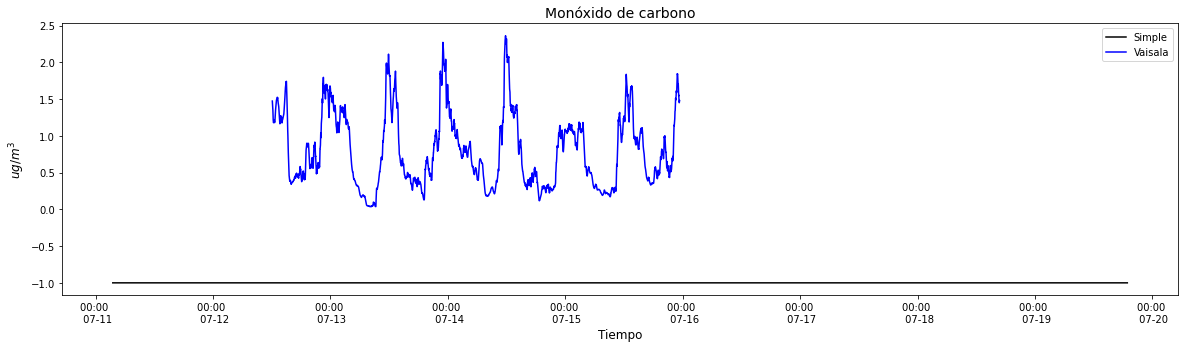

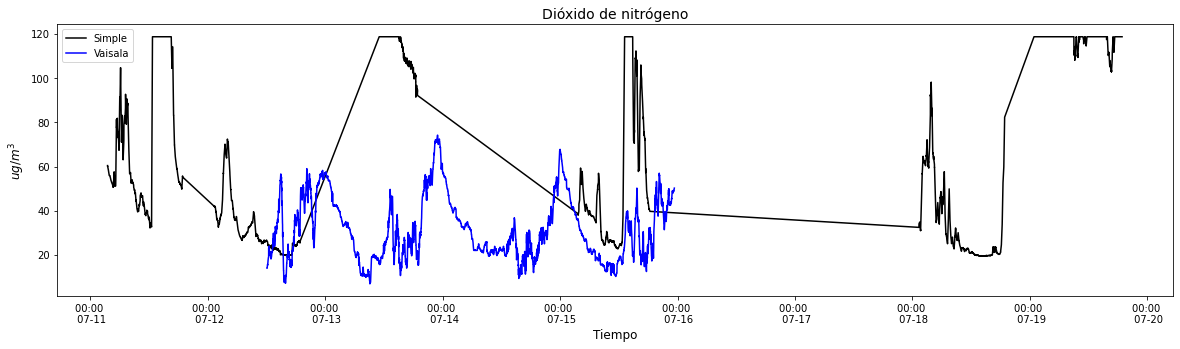

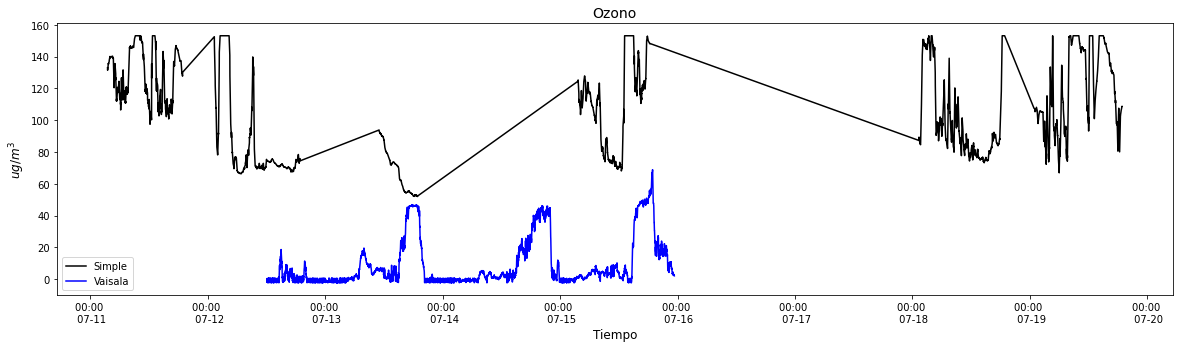

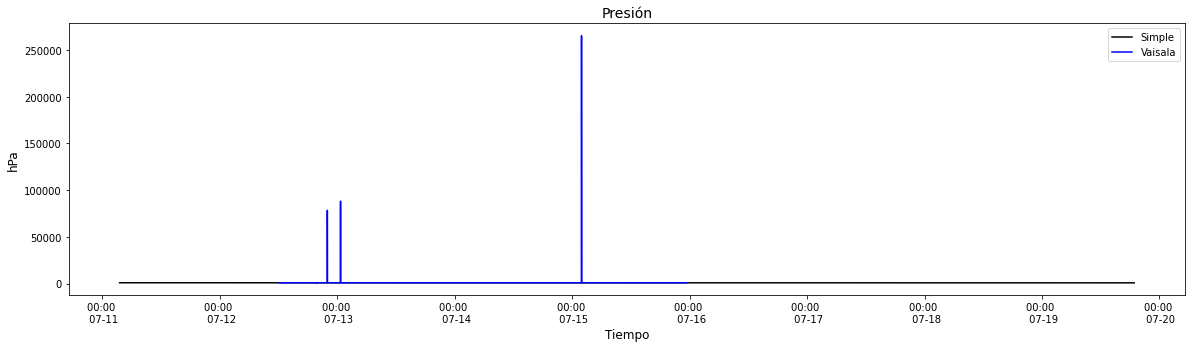

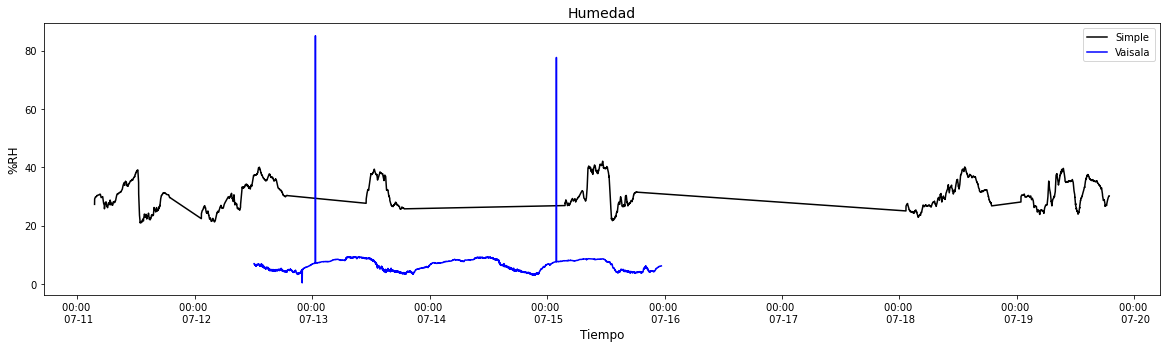

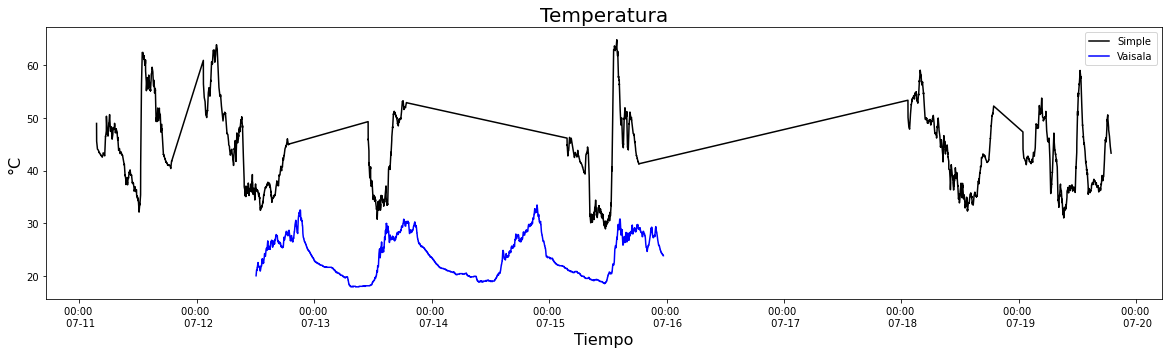

In [31]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple.index, df_simple["CO"], label="Simple", color="black")
ax.plot(df_vaisala.index, df_vaisala["CO (ppm)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=12, color='k')
ax.set_xlabel("Tiempo", fontsize=12, color='k')
ax.set_title("Monóxido de carbono", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple.index, df_simple["NO2"], label="Simple", color="black")
ax.plot(df_vaisala.index, df_vaisala["NO2 (ppm)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=12, color='k')
ax.set_xlabel("Tiempo", fontsize=12, color='k')
ax.set_title("Dióxido de nitrógeno", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple.index, df_simple["O3"], label="Simple", color="black")
ax.plot(df_vaisala.index, df_vaisala["O3 (ppm)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=12, color='k')
ax.set_xlabel("Tiempo", fontsize=12, color='k')
ax.set_title("Ozono", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple.index, df_simple["barometer_pressure"]/100, label="Simple", color="black")
ax.plot(df_vaisala.index, df_vaisala["PRES (hPa)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("hPa", fontsize=12, color='k')
ax.set_xlabel("Tiempo", fontsize=12, color='k')
ax.set_title("Presión", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple.index, df_simple["humidity"], label="Simple", color="black")
ax.plot(df_vaisala.index, df_vaisala["HUM (%RH)"]/10, label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("%RH", fontsize=12, color='k')
ax.set_xlabel("Tiempo", fontsize=12, color='k')
ax.set_title("Humedad", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple.index, df_simple["temperature"], label="Simple", color="black")
ax.plot(df_vaisala.index, df_vaisala["TEMP (C)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("°C", fontsize=16, color='k')
ax.set_xlabel("Tiempo", fontsize=16, color='k')
ax.set_title("Temperatura", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

In [52]:
df_simple2["barometer_pressure"] = df_simple["barometer_pressure"]["2022-07-15 03:00:00":"2022-07-15 18:00:00"]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


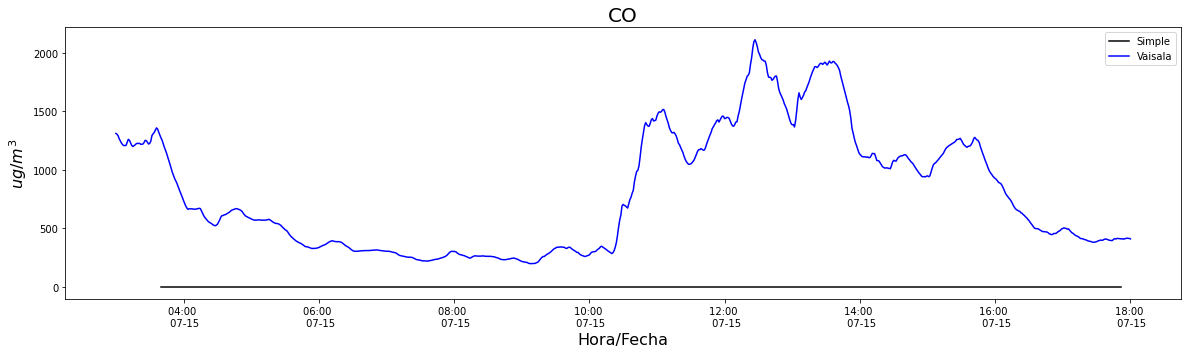

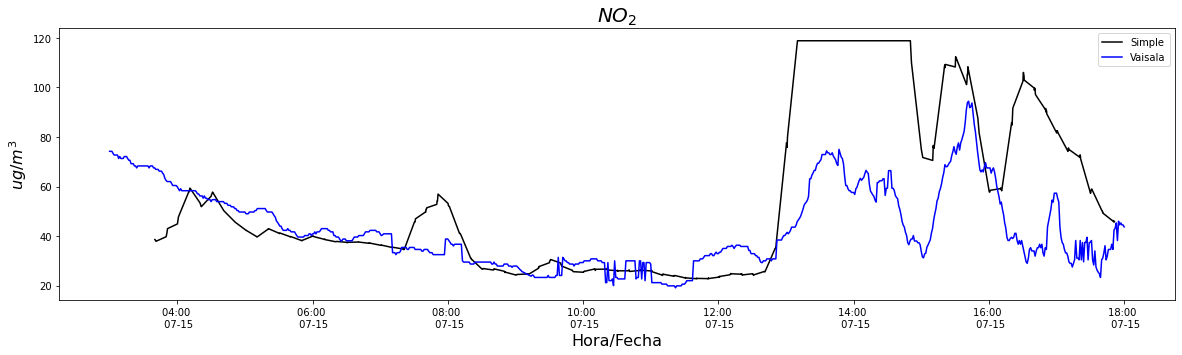

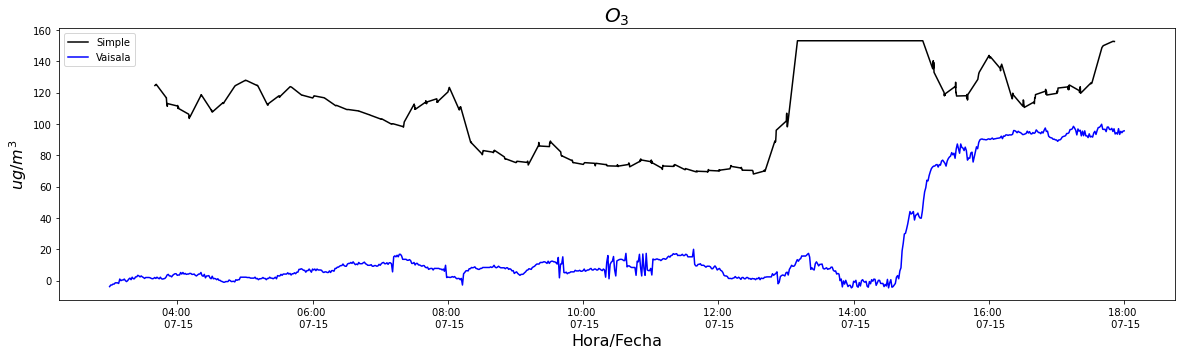

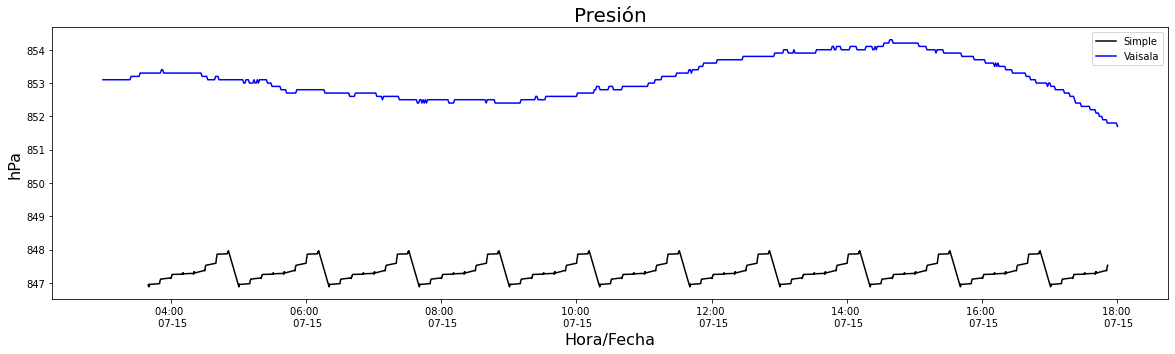

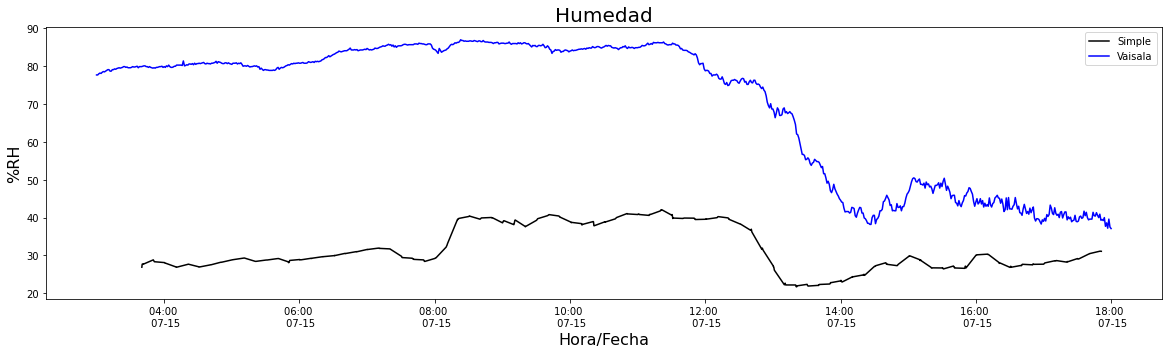

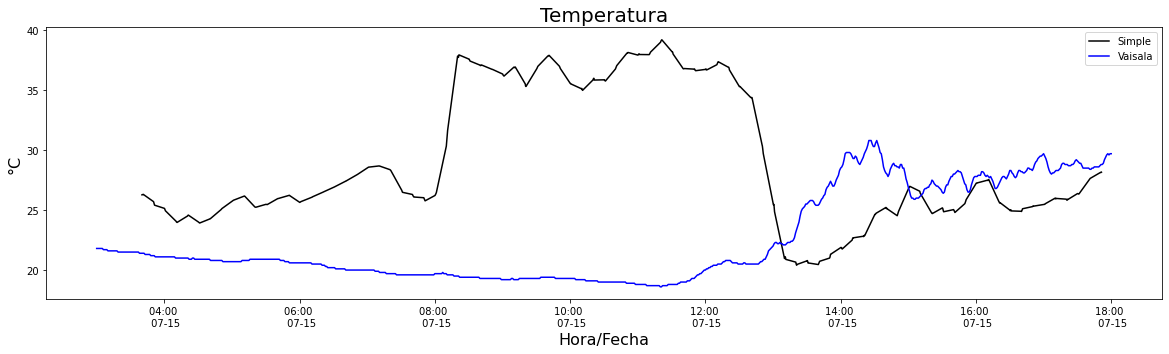

In [40]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["CO"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["CO (ug/m3)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title("CO", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["NO2"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["NO2 (ug/m3)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title(r"$NO_2$", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["O3"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["O3 (ug/m3)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title(r"$O_3$", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["barometer_pressure"]/100, label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["PRES (hPa)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("hPa", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title("Presión", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["humidity"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["HUM (%RH)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("%RH", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title("Humedad", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["barometer_temperature"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["TEMP (C)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("°C", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title("Temperatura", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

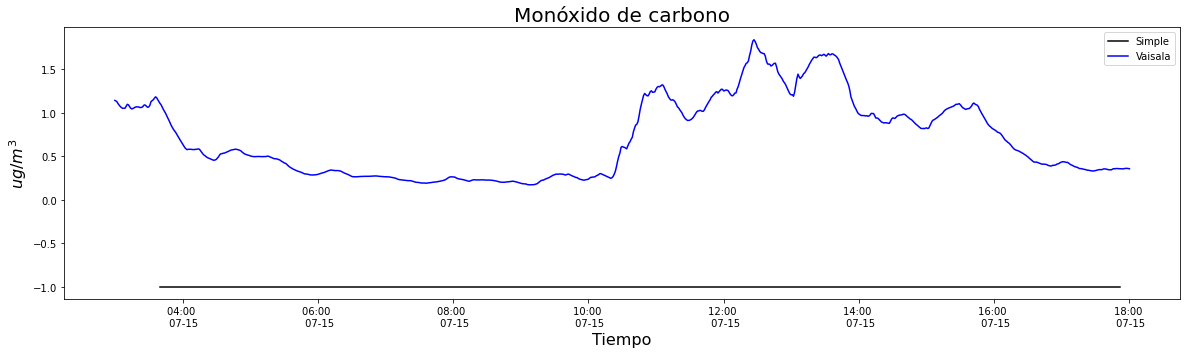

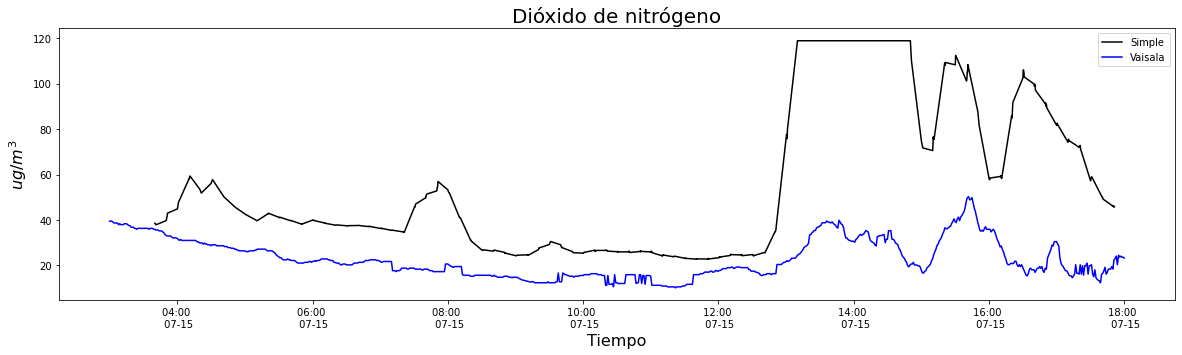

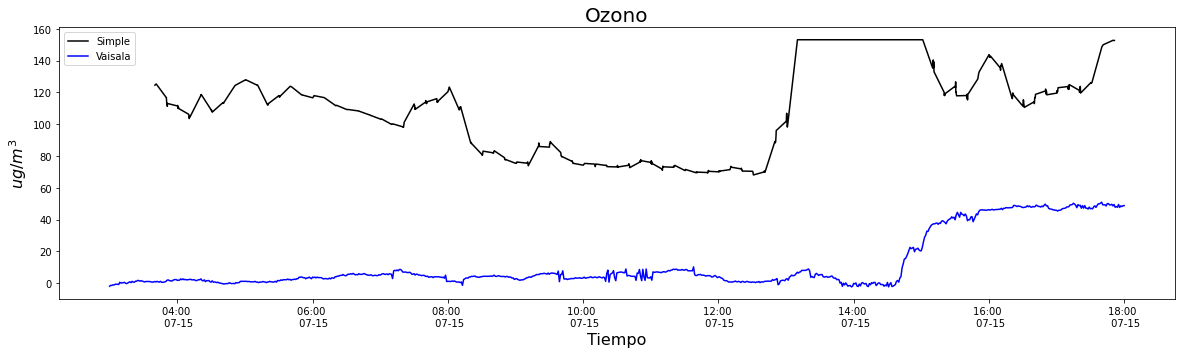

In [65]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["CO"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["CO (ppm)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=16, color='k')
ax.set_xlabel("Tiempo", fontsize=16, color='k')
ax.set_title("Monóxido de carbono", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["NO2"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["NO2 (ppm)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=16, color='k')
ax.set_xlabel("Tiempo", fontsize=16, color='k')
ax.set_title("Dióxido de nitrógeno", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_simple2.index, df_simple2["O3"], label="Simple", color="black")
ax.plot(df_vaisala2.index, df_vaisala2["O3 (ppm)"], label="Vaisala", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m^3$", fontsize=16, color='k')
ax.set_xlabel("Tiempo", fontsize=16, color='k')
ax.set_title("Ozono", fontsize=20, color='k')
plt.legend(loc=0)
plt.show()


In [64]:
df_simple2["O3 (ug/m3)"] = df_simple2["O3 (ug/m3)"]/10

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
np.max(df_vaisala2["HUM (%RH)"])

87.0

In [54]:
print("Simple")
for var in ["NO2 (ug/m3)","CO (ug/m3)","O3 (ug/m3)","barometer_temperature","humidity","barometer_pressure"]:
    print(var)
    simple_min = np.min(df_simple2[var])
    simple_argmin = np.argmin(df_simple2[var])
    simple_max = np.max(df_simple2[var])
    simple_argmax = np.argmax(df_simple2[var])
    simple_avg = np.mean(df_simple2[var])
    print("Min", round(simple_min,2), simple_argmin)
    print("Max", round(simple_max,2), simple_argmax)
    print("Avg", round(simple_avg,2))
    
print("VAISALA")
for var in ["NO2 (ug/m3)","CO (ug/m3)","O3 (ug/m3)","TEMP (C)","HUM (%RH)","PRES (hPa)"]:
    print(var)
    siata_min = np.min(df_vaisala2[var])
    siata_argmin = np.argmin(df_vaisala2[var])
    siata_max = np.max(df_vaisala2[var])
    siata_argmax = np.argmax(df_vaisala2[var])
    siata_avg = np.mean(df_vaisala2[var])
    print("Min", round(siata_min,2), siata_argmin)
    print("Max", round(siata_max,2), siata_argmax)
    print("Avg", round(siata_avg,2))

Simple
NO2 (ug/m3)
Min 42.69 2022-07-15 11:50:30
Max 223.38 2022-07-15 13:10:10
Avg 104.07
CO (ug/m3)
Min 0 2022-07-15 03:40:10
Max 0 2022-07-15 03:40:10
Avg 0.0
O3 (ug/m3)
Min 133.38 2022-07-15 12:31:10
Max 300.06 2022-07-15 13:10:10
Avg 214.74
barometer_temperature
Min 20.4 2022-07-15 13:21:00
Max 39.2 2022-07-15 11:21:20
Avg 29.06
humidity
Min 21.7 2022-07-15 13:21:00
Max 42.09 2022-07-15 11:21:20
Avg 31.66
barometer_pressure
Min 84688.3 2022-07-15 03:40:40
Max 84796.8 2022-07-15 04:51:20
Avg 84734.69
VAISALA
NO2 (ug/m3)
Min 19.1 2022-07-15 11:22:00
Max 94.4 2022-07-15 15:42:00
Avg 43.14
CO (ug/m3)
Min 197.5 2022-07-15 09:08:00
Max 2113.7 2022-07-15 12:27:00
Avg 801.32
O3 (ug/m3)
Min -4.6 2022-07-15 13:58:00
Max 99.8 2022-07-15 17:40:00
Avg 23.23
TEMP (C)
Min 18.6 2022-07-15 11:20:00
Max 30.8 2022-07-15 14:25:00
Avg 22.56
HUM (%RH)
Min 37.1 2022-07-15 18:00:00
Max 87.0 2022-07-15 08:23:00
Avg 70.28
PRES (hPa)
Min 851.7 2022-07-15 18:00:00
Max 854.3 2022-07-15 14:38:00
Avg 853.14


In [42]:
data = {
    'Gas': ['NO2 (ug/m3)', 'CO (ug/m3)', 'O3 (ug/m3)', 'barometer_temperature', 'humidity', 'barometer_pressure',
            'NO2 (ug/m3)', 'CO (ug/m3)', 'O3 (ug/m3)', 'TEMP (C)', 'HUM (%RH)', 'PRES (hPa)'],
    'Type': ['Simple', 'Simple', 'Simple', 'Simple', 'Simple', 'Simple',
             'VAISALA', 'VAISALA', 'VAISALA', 'VAISALA', 'VAISALA', 'VAISALA'],
    'Min': [42.69, 0, 133.38, 20.4, 21.7, 84688.3,
            19.1, 197.5, 0, 18.6, 37.1, 851.7],
    'Max': [223.38, 0, 300.06, 39.2, 42.09, 84796.8,
            94.4, 2113.7, 99.8, 30.8, 87.0, 854.3],
    'Avg': [104.07, 0, 214.74, 29.06, 31.66, 84734.69,
            43.14, 801.32, 23.23, 22.56, 70.28, 853.14],
    'Timestamp': ['2022-07-15 11:50:30', '2022-07-15 03:40:10', '2022-07-15 12:31:10',
                  '2022-07-15 13:21:00', '2022-07-15 13:21:00', '2022-07-15 03:40:40',
                  '2022-07-15 11:22:00', '2022-07-15 09:08:00', '2022-07-15 13:58:00',
                  '2022-07-15 11:20:00', '2022-07-15 18:00:00', '2022-07-15 18:00:00']
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Convert 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [40]:
for var in ["NO2 (ug/m3)","CO (ug/m3)","O3 (ug/m3)","barometer_temperature","humidity","barometer_pressure"]:
    df_simple2[var] = df_simple2[var].clip(lower=0)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
df

,Gas,Type,Min,Max,Avg,Timestamp
0,NO2 (ug/m3),Simple,42.69,223.38,104.07,2022-07-15 11:50:30
1,CO (ug/m3),Simple,0.00,0.00,0.00,2022-07-15 03:40:10
2,O3 (ug/m3),Simple,133.38,300.06,214.74,2022-07-15 12:31:10
3,barometer_temperature,Simple,20.40,39.20,29.06,2022-07-15 13:21:00
4,humidity,Simple,21.70,42.09,31.66,2022-07-15 13:21:00
5,barometer_pressure,Simple,84688.30,84796.80,84734.69,2022-07-15 03:40:40
6,NO2 (ug/m3),VAISALA,19.10,94.40,43.14,2022-07-15 11:22:00
7,CO (ug/m3),VAISALA,197.50,2113.70,801.32,2022-07-15 09:08:00
8,O3 (ug/m3),VAISALA,0.00,99.80,23.23,2022-07-15 13:58:00
9,TEMP (C),VAISALA,18.60,30.80,22.56,2022-07-15 11:20:00
